In [99]:
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

import fnmatch
import os
import pandas as pd
import geopandas as gpd

from datacube_stats.statistics import GeoMedian
from datacube.helpers import ga_pq_fuser
from datacube.storage import masking
from datacube.helpers import write_geotiff
import xarray as xr

#get the DEA version of the plotting functions
import sys
sys.path.append(os.path.abspath('/g/data/r78/DPIPWE_lm/dea-notebooks/10_Scripts'))
import DEAPlotting
import DEADataHandling


import datacube
dc = datacube.Datacube(app='load_nbarx_example')

In [112]:
#x, y = (1385000.0, 1390000.0), (-4570000.0, -4575000.0)
sensors = ['ls7', 'ls8'] #take or remove as needed
deriv = 'nbart'
#product = 'nbart' #
time = ('2016-11-01', '2016-12-31')
resolution = (-50,50)
bands = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2']
epoch = ('2016', '2017') # time query for datacube function can be just years
cmonths = [11,12,1,2,3,4]

subset = True
#label = '13,-48'
label = False
#len(label)

In [113]:
outputdir = '/g/data/r78/DPIPWE_lm/test_burn_mapping/output_data'
if not os.path.exists(outputdir):
    print("output directory doesn't exist")
    exit()

albers = gpd.read_file('/g/data/r78/DPIPWE_lm/test_burn_mapping/reference_data/Albers_Australia_Coast_Islands_Reefs.shp')
if label:
    index = albers[albers['label']==label].index[0]
    x = (albers.loc[index]['X_MIN'], albers.loc[index]['X_MAX'])
    y = (albers.loc[index]['Y_MIN'], albers.loc[index]['Y_MAX'])
    output_filename = outputdir + '/summer_composite_2016-2017_'+'_'.join(label.split(','))+'.nc'
    print("Working on tile {}...".format(label))
else:
    x, y = (1385000.0, 1375000.0), (-4570000.0, -4580000.0)
    if subset:
        output_filename = 'composite_2016-2017_test_subset.nc'
    else:
        output_filename = 'composite_2016-2017_test_one.nc'

In [114]:
    query = {'x': (1300000.0, 1400000.0),
             'y': (-4700000.0, -4800000.0),
             #'time': time,
             'resolution': resolution,
             'crs': 'EPSG:3577'}


In [116]:
cm_scenes = []

for sensor in sensors:
    prod = sensor + '_'+deriv+'_albers'

    scenes = dc.find_datasets(product=prod, time=epoch, **query)

    for scene in scenes:
        if scene.center_time.month in cmonths:
            cm_scenes.append(scene)
        else:
            print('No custom months found')

No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom months found
No custom m

In [98]:
  
    dsma = DEADataHandling.load_clearlandsat(dc=dc, query=query,
                                           #product=product,
                                           masked_prop=0,
                                           sensors = sensors,
                                           bands_of_interest = bands,
                                           #bands_of_interest = ['red', 'green', 'blue', 'nir, ''swir1', 'swir2'],
                                           mask_pixel_quality=True,
                                           ls7_slc_off=True)


Loading ls7 pixel quality
    Loading 1 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 8 filtered ls8 timesteps
Combining and sorting ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


In [61]:
def multigm(x, y):
    query = {'x': x,
             'y': y,
             'time': time,
             'resolution': resolution,
             'crs': 'EPSG:3577'}
    #print(query)

    dsm = DEADataHandling.load_clearlandsat(dc=dc, query=query,
                                           product=product,
                                           masked_prop=0,
                                           sensors = sensors,
                                           bands_of_interest = bands,
                                           mask_pixel_quality=True,
                                           ls7_slc_off=True)


    # compute geomedian
    #dsm_gm = GeoMedian().compute(dsm)
    #return dsm_gm.copy()
    return dsm.copy()

In [62]:
xm, ym = (x[0]+x[1])/2, (y[0]+y[1])/2
x1, x2 = (x[0], xm), (xm, x[1])
y1, y2 = (y[0], ym), (ym, y[1])
if subset:
    out1 = multigm(x1, y)
    out2 = multigm(x2, y)
    out = xr.concat([out1, out2], dim='x')
else:
    out = multigm(x, y)

Loading ls7 pixel quality
    Loading 3 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 4 filtered ls8 timesteps
Combining and sorting ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)
Loading ls7 pixel quality
    Loading 3 filtered ls7 timesteps
Loading ls8 pixel quality
    Loading 4 filtered ls8 timesteps
Combining and sorting ls7, ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


In [90]:
dsma

<xarray.Dataset>
Dimensions:    (time: 9, x: 2000, y: 2000)
Coordinates:
  * y          (y) float64 -4.7e+06 -4.7e+06 -4.7e+06 ... -4.8e+06 -4.8e+06
  * x          (x) float64 1.3e+06 1.3e+06 1.3e+06 ... 1.4e+06 1.4e+06 1.4e+06
  * time       (time) datetime64[ns] 2016-11-04T23:52:38 ... 2016-12-31T23:46:20
Data variables:
    red        (time, y, x) float64 554.0 975.0 726.0 585.0 ... nan nan nan nan
    green      (time, y, x) float64 597.0 1.011e+03 714.0 585.0 ... nan nan nan
    blue       (time, y, x) float64 456.0 776.0 687.0 497.0 ... nan nan nan nan
    nir        (time, y, x) float64 2.42e+03 2.917e+03 2.965e+03 ... nan nan nan
    swir1      (time, y, x) float64 1.5e+03 2.109e+03 1.806e+03 ... nan nan nan
    swir2      (time, y, x) float64 918.0 1.292e+03 996.0 ... nan nan nan
    data_perc  (time, y, x) float64 0.4201 0.4201 0.4201 0.4201 ... nan nan nan
Attributes:
    crs:      EPSG:3577

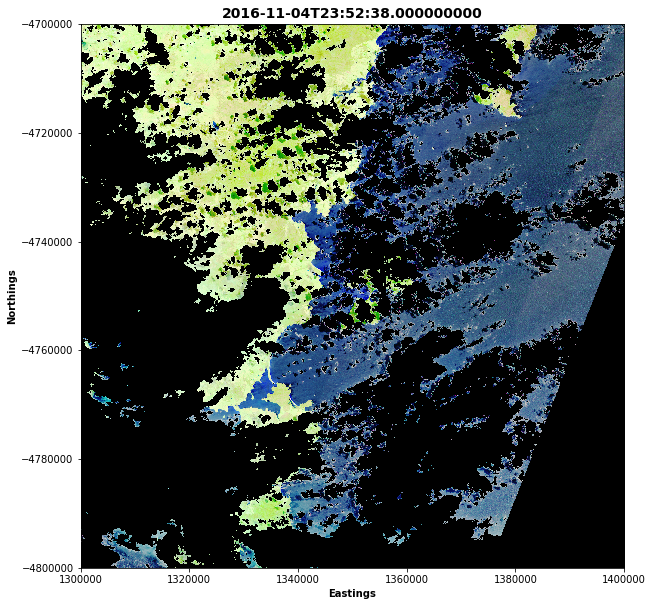

In [92]:
DEAPlotting.three_band_image(dsma, bands = ['swir1', 'nir', 'green'], time = 0, contrast_enhance=True);

In [ ]:
time = ('2017-12-01', '2018-01-10')
resolution = (50,50)
product = 'nbart'

In [ ]:
sensors = ['ls8', 'ls7']
#x, y = (1385000.0, 1390000.0), (-4570000.0, -4575000.0)
#product = 'nbart'
#product = 'ard'

In [ ]:
subset = True

In [ ]:
time

In [ ]:
    query = {'x': x,
             'y': y,
             'time': time,
             'resolution': resolution,
             'crs': 'EPSG:3577',
             'output_crs': 'EPSG:3577'}

    
    dsm = DEADataHandling.load_clearlandsat(dc=dc,query=query,
                                            product=product,
                                            sensors=sensors,
                                            bands_of_interest = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2'],
                                            ls7_slc_off=True,
                                            masked_prop=0)

In [ ]:
def multigm(x, y):
    query = {'x': x,
             'y': y,
             'time': time,
             'resolution': resolution,
             'crs': 'EPSG:3577',
             'output_crs': 'EPSG:3577'}

    
    dsm = DEADataHandling.load_clearlandsat(dc=dc,query=query,
                                            product=product,
                                            sensors=sensors,
                                            masked_prop=0)
                                            #query=query,
                                            #mask_pixel_quality=True)
                                            #sensors = sensors,
                                            #bands_of_interest=['blue', 'green', 'nir', 'red', 'swir1', 'swir2'],
                                            #ls7_slc_off=True)

    
    # compute geomedian
    #return dsm.copy()
    multi = GeoMedian().compute(dsm)
    return multi.copy()

In [ ]:
y

In [ ]:
xm, ym = (x[0]+x[1])/2, (y[0]+y[1])/2
x1, x2 = (x[0], xm), (xm, x[1])
y1, y2 = (y[0], ym), (ym, y[1])
if subset:
    out1 = multigm(x1, y)
    out2 = multigm(x2, y)
    out = xr.concat([out1, out2], dim='x')
else:
    out = multigm(x, y)

In [ ]:
out

In [ ]:
nbrx_ds, crs, affine = DEADataHandling.load_nbarx(dc, 'ls8', query, product='nbar')

In [ ]:
nbrx_ds

In [ ]:
DEAPlotting.three_band_image(nbrx_ds, bands = ['swir1', 'nir', 'green'], time = 1, contrast_enhance=True);

In [ ]:
# Set up spatial and temporal query
time = ('2017-11-01', '2017-12-31')
resolution = (10,10)

#query = {'x': x,
#         'y': y,
#         'time': ('2015-11-01', '2015-12-31'),
#         'resolution': (100,100),
#         'crs': 'EPSG:3577'}
         
# Load observations with less than 25% cloud from ls5, ls7 and ls8 as a single combined dataset
#landsat_ds = DEADataHandling.load_clearlandsat(dc=dc, query=query, sensors=['ls5', 'ls7', 'ls8'], 
#                                   bands_of_interest=['red', 'green', 'blue'], 
#                                   masked_prop=0.75, mask_pixel_quality=True, ls7_slc_off=True)

In [ ]:
# Sentinel 2 load test
query = {'x': x,
         'y': y,
         'time': time,
         'resolution': resolution,
         'crs': 'EPSG:3577',
         'output_crs': 'EPSG:3577'}
    
sentd = DEADataHandling.load_clearsentinel2(dc=dc, query=query,
                                            product=product,
                                            masked_prop=0,
                                            mask_pixel_quality=True)

In [ ]:
sentd

In [ ]:
DEAPlotting.three_band_image(sentd, bands = ['nbart_blue', 'nbart_green', 'nbart_red'], time=2, contrast_enhance=True);

In [ ]:
multi

In [ ]:
DEAPlotting.three_band_image(out2, bands = ['nbart_blue', 'nbart_green', 'nbart_red'], contrast_enhance=False);

In [ ]:
ds_multi = DEADataHandling.load_clearlandsat(dc=dc, query=query, masked_prop = 0.25, ls7_slc_off = True, 
                                             sensors=sensors )

In [ ]:
ds_multi

In [ ]:
DEAPlotting.three_band_image(ds_multi, bands = ['swir1', 'nir', 'green'], time = 3, contrast_enhance=True);

In [ ]:
ds.to_netcdf('test_output_oct31.nc')

In [ ]:
subset = True

In [ ]:
if subset:
    print('subset is')
else:
    print('subset is not')

In [ ]:
DEADataHandling.write_your_netcdf(ds_multi, 'dataset_name_here', 'write_netcdf_multi.nc', 'EPSG:3577')